In [228]:
# Define polygon
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon
%matplotlib widget


In [371]:
def plot_polygon(polygon_vertices):
    # Plot polygon
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Create a polygon patch
    polygon_patch = Polygon(polygon_vertices, closed=True, edgecolor='r', linewidth=2, facecolor='none')
    
    # Add the polygon patch to the axis
    ax.add_patch(polygon_patch)
    
    # Set the aspect of the plot to be equal
    ax.set_aspect('equal')
    
    # Set limits for the axes
    xmax=max(polygon_vertices)[0]
    ymax=max(polygon_vertices)[1]
    ax.set_xlim(0, max(ymax,xmax)+1)
    ax.set_ylim(0, max(ymax,xmax)+1)
    
    # Show the plot
    plt.grid()
    plt.show()

    return plt

def plot_cones(polygon_vertices):
    t=linspace(0,2*pi,10)
    print(t)

In [211]:
def convex_hull(polygon_vertices):
    # Returns the convex hull of a polygon
    # Useful if the list of vertices is not in the correct order
    # For example: convex_hull([[0,0], [2, 2], [0, 1], [2,0]])
    # returns [[0, 1], [0, 0], [2, 0], [2, 2]]
    
    # Convert the list of points to a NumPy array
    points_array = np.array(polygon_vertices)
    
    # Calculate the convex hull of the points
    hull = ConvexHull(points_array)
    
    # Get the indices of the points forming the convex hull
    convex_hull_indices = hull.vertices
    
    # Get the points forming the convex hull
    convex_hull_points = points_array[convex_hull_indices]
    
    # Return the points forming the convex polygon
    return convex_hull_points.tolist()

In [212]:
def lower_hull(polygon_vertices):
    temp=polygon_vertices
    temp.append((0,max(polygon_vertices, key=lambda point: point[1])[1]))
    temp.append((max(polygon_vertices, key=lambda point: point[0])[0],0))
    return convex_hull(temp)

In [213]:
def is_convex(polygon_vertices):
    """
    Check if a polygon defined by the given points is convex.

    Example: 
    polygon_points = [(0, 0), (1, 1), (2, 3), (3, 2), (2.5, 0.5), (1.5, 0.5)]
    print("Is polygon convex?", is_convex(polygon_points))
    """
    def cross_product(p1, p2, p3):
        """
        Calculate the cross product of vectors p1p2 and p1p3.
        """
        x1, y1 = p2[0] - p1[0], p2[1] - p1[1]
        x2, y2 = p3[0] - p1[0], p3[1] - p1[1]
        return x1 * y2 - x2 * y1
    
    num_points = len(polygon_vertices)
    if num_points < 3:
        return False
    
    # Calculate the cross product of consecutive edges
    # If the signs are the same for all cross products, the polygon is convex
    sign = None
    for i in range(num_points):
        cp = cross_product(polygon_vertices[i], polygon_vertices[(i+1) % num_points], polygon_vertices[(i+2) % num_points])
        if cp == 0:
            continue
        if sign is None:
            sign = cp > 0
        elif sign != (cp > 0):
            return False
    return True

In [214]:
def is_realplus(polygon_vertices):
    return (min(polygon_vertices, key=lambda point: point[0])[0] >= 0) and \
           (min(polygon_vertices, key=lambda point: point[1])[1] >= 0)

In [215]:
def is_lower(polygon_vertices):
    if not is_convex(polygon_vertices): 
        print("Warning: The polygon is not convex, this check might give a false positive")

    if not is_realplus(polygon_vertices): 
        print("Warning: The polygon is not contained in the first quadrant.\n \
The question is not well posed")

    if (0,0) not in polygon_vertices:
        return False
    
    max_x = max(polygon_vertices, key=lambda point: point[0])[0]
    max_y = max(polygon_vertices, key=lambda point: point[1])[1]
    print(max_x,max_y)
    return ((0,max_y) in polygon_vertices) and ((max_x,0) in polygon_vertices)

In [216]:
def phi(x,polygon):
    # Supporting function
    
    vector_x = np.array(x)
    p=0
    for n in polygon: 
        p = max(p,np.dot(vector_x,np.array(n)))

    return p

In [217]:
def phi_mesh(mesh,polygon_vertices):
    # Supporting function - mesh version
    mesh = (X,Y)
    flat = [arr.flatten() for arr in mesh]
    
    dot=np.dot(np.array(polygon_vertices[0]),flat)
    for p in polygon_vertices:
        v = np.array(p)
        dot=np.maximum(dot,np.dot(v,flat))
    
    a = dot.reshape(mesh[0].shape)
    return(a)


In [376]:
# Define the vertices of the polygon
pol = [[0,0], [1, 2], [2, 3], [3, 2], [2.5, 0.5], [1.5, 0]]
#pol = [[0,0], [0, 1], [2, 2], [2, 0]]
pol = [[0,0], [1,0],[0,1],[4,1]]

if [0,0] not in pol:
    print("Warning: The polygon does not contain (0,0)")

if not is_convex(pol): 
    print("Warning: The polygon is not convex")

if not is_realplus(pol): 
    print("Warning: The polygon is not contained in the first quadrant")



[[0, 1], [0, 0], [1, 0], [4, 1]]
(0.0, -1.0, 0.0, 0.31622776601683794) (1.0, 0.0, -1.0, -0.9486832980505138)


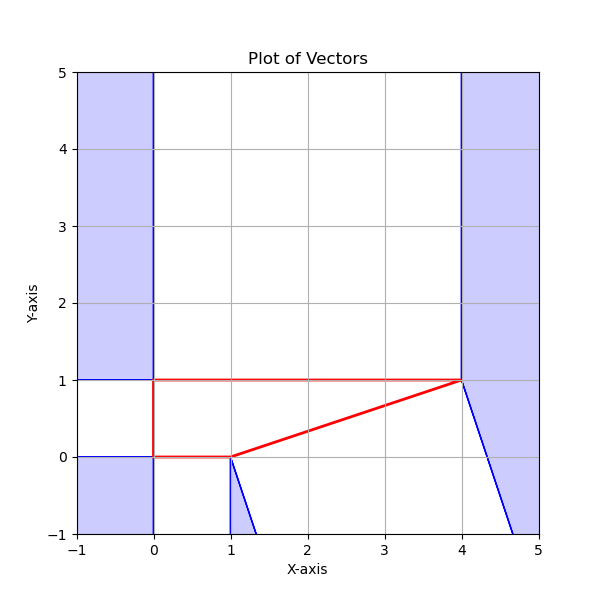

In [377]:
con = [[0] * 2 for _ in range(len(pol))]
pol = convex_hull(pol) # Positive orientation
print(pol)
t = [pol[0][1] - pol[len(pol)-1][1],pol[len(pol)-1][0]-pol[0][0]]
con[0] = t/np.linalg.norm(t)

for i in range(1,len(pol)):
    t = [pol[i][1] - pol[i-1][1],pol[i-1][0]-pol[i][0]]
    con[i] = t/np.linalg.norm(t)

x_con, y_con = zip(*con)
x_pol, y_pol = zip(*pol)
plt.figure(figsize=(6, 6))

print(x_con,y_con)
# Plot the line segments
for i in range(len(x_pol)):
    point = [x_pol[i],y_pol[i]]
    vector1 = [x_con[i], y_con[i]]
    if i == len(x_pol)-1:
        vector2 = [x_con[0], y_con[0]]
    else:
        vector2 = [x_con[i+1], y_con[i+1]]
    
    plt.arrow(point[0],point[1],10*vector1[0],10*vector1[1], color='b', head_width=0.05, head_length=0.1)
    plt.arrow(point[0],point[1],10*vector2[0],10*vector2[1], color='b', head_width=0.05, head_length=0.1)

    norm_v1 = np.linalg.norm(vector1)
    norm_v2 = np.linalg.norm(vector2)
    angle1 = np.arctan2(vector1[1],vector1[0]) *180/np.pi
    angle2 = np.arctan2(vector2[1],vector2[0]) *180/np.pi
    plt.gca().add_patch(Wedge(point, 10*max(norm_v1, norm_v2), angle1, angle2, color='b', alpha=0.2))
    

polygon_patch = Polygon(pol, closed=True, edgecolor='r', linewidth=2, facecolor='none')
plt.gca().add_patch(polygon_patch)
# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of Vectors')

M = max(max(x_pol),max(y_pol))
m = min(min(x_pol),min(y_pol))
plt.xlim(m-1, M+1)  # Set the x-axis limits from 0 to 6
plt.ylim(m-1, M+1)  # Set the y-axis limits from 0 to 12

# Set aspect ratio to be equal
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.grid(True)
plt.show()



In [378]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some 3D data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))
Z = phi((X,Y),polygon_vertices)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('phi')
ax.set_title('3D Plot')
# Show the plot
plt.show()

ValueError: shapes (2,100,100) and (2,) not aligned: 100 (dim 2) != 2 (dim 0)